In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [21]:
df1 = pd.read_csv("D:\ml deployment\marathon_results_2015.csv")
df2 = pd.read_csv("D:\ml deployment\marathon_results_2016.csv")
df3 = pd.read_csv("D:\ml deployment\marathon_results_2017.csv")
df = pd.concat([df1, df2, df3])

In [22]:
df.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Unnamed: 8
0,0.0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,NaN
1,1.0,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,NaN
2,2.0,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,NaN
3,3.0,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,NaN
4,4.0,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,NaN


In [23]:
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

df['Official Time'] = df['Official Time'].apply(time_to_seconds)
df['Pace'] = df['Pace'].apply(time_to_seconds)


In [24]:
X = df[['Pace']]
y = df['Official Time']

In [25]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)
print(y_pred)

[17002.81390428 14879.24791932 16766.86212817 ... 17422.28372847
 16766.86212817 10658.3328134 ]


In [28]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test ,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mse ** 0.5

In [29]:
print("R-square:" , r2)
print("mean_absolute_error:" , mae)
print("mean_squared_error:" , mse)
print("Root mean-squared error:" , rmse)

R-square: 0.9967206692306244
mean_absolute_error: 7.711556918668609
mean_squared_error: 20427.527867235378
Root mean-squared error: 142.9249028939162


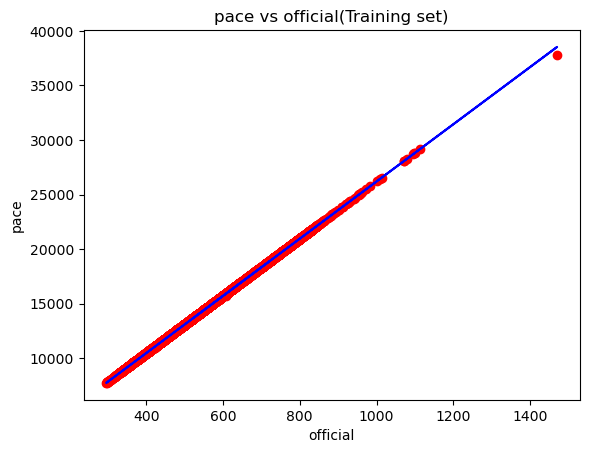

In [30]:
plt.scatter(X_train, y_train , color='red')
plt.plot(X_train, model.predict(X_train) , color='blue')
plt.title('pace vs official(Training set)')
plt.xlabel('official')
plt.ylabel('pace')
plt.show()

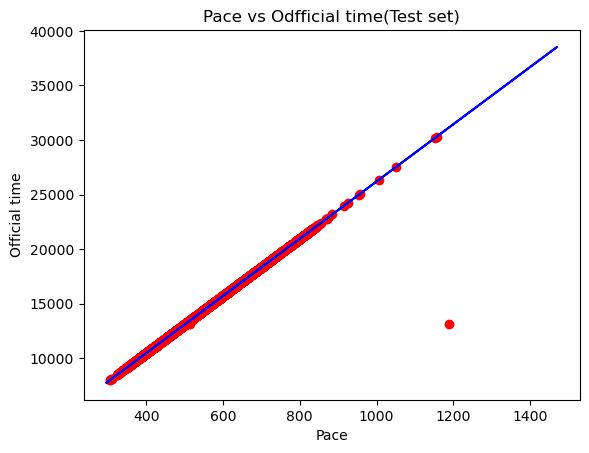

In [31]:
plt.scatter(X_test, y_test , color='red')
plt.plot(X_train, model.predict(X_train) , color='blue')
plt.title('Pace vs Odfficial time(Test set)')
plt.xlabel('Pace')
plt.ylabel('Official time')
plt.show()

In [32]:
print("*** Making predictions for new data ***")
new_pace_for_predictions = [1.5, 4, 3, 5, 2, 88, 3]

for new_pace in new_pace_for_predictions:
    new_time_pred = model.predict(pd.DataFrame({'Pace':[new_pace]}))
    print("Predicted official time for {} pace: {}".format(new_pace , new_time_pred))

*** Making predictions for new data ***
Predicted official time for 1.5 pace: [27.39445656]
Predicted official time for 4 pace: [92.93661659]
Predicted official time for 3 pace: [66.71975258]
Predicted official time for 5 pace: [119.15348061]
Predicted official time for 2 pace: [40.50288857]
Predicted official time for 88 pace: [2295.1531936]
Predicted official time for 3 pace: [66.71975258]


In [34]:
import joblib
joblib.dump(model , r"D:\ml deployment\final_pace_model.pkl")

['D:\\ml deployment\\final_pace_model.pkl']

In [35]:
print(X)
print(X.columns)
print(list(X.columns))

       Pace
0       296
1       298
2       299
3       300
4       300
...     ...
26405   984
26406  1000
26407  1007
26408  1009
26409  1095

[79638 rows x 1 columns]
Index(['Pace'], dtype='object')
['Pace']


In [36]:
joblib.dump(list(X.columns) , r'D:\ml deployment\pace_column_names.pkl')

['D:\\ml deployment\\pace_column_names.pkl']

In [37]:
## Loading Model
col_names = joblib.load('pace_column_names.pkl')
print(col_names)

['Pace']


In [38]:
loaded_model = joblib.load("final_pace_model.pkl")

In [39]:
print("*** Making predictions for new data ***")
new_pace_for_predictions = [1.5, 4, 3, 5, 2, 88, 3]

for new_pace in new_pace_for_predictions:
    new_time_pred = loaded_model.predict(pd.DataFrame({'Pace':[new_pace]}))
    print("Predicted official time for {} pace: {}".format(new_pace , new_time_pred))

*** Making predictions for new data ***
Predicted official time for 1.5 pace: [27.39445656]
Predicted official time for 4 pace: [92.93661659]
Predicted official time for 3 pace: [66.71975258]
Predicted official time for 5 pace: [119.15348061]
Predicted official time for 2 pace: [40.50288857]
Predicted official time for 88 pace: [2295.1531936]
Predicted official time for 3 pace: [66.71975258]
